In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, classification_report, precision_recall_curve
from sklearn import metrics
from sklearn.utils.multiclass import type_of_target
from sklearn.linear_model import LinearRegression

In [72]:
train = pd.read_csv("/home/daniil_ast/programing/python/statistics/house-prices-advanced/Data/train.csv")
test = pd.read_csv("/home/daniil_ast/programing/python/statistics/house-prices-advanced/Data/test.csv")
submission = pd.read_csv("/home/daniil_ast/programing/python/statistics/house-prices-advanced/Data/sample_submission.csv")

In [ ]:
X_train = pd.get_dummies(train.drop(["SalePrice"],axis=1)).fillna(0)
X_train = X_train.replace({True:1,False:0}).set_index("Id")
y_train = train[["Id","SalePrice"]].set_index("Id")
test = pd.get_dummies(test).fillna(0)
test = test.replace({True:1,False:0}).set_index("Id")
X_train = X_train[sorted(X_train.columns )]

In [74]:
for i in X_train.columns:
    if not i in test.columns:
        test[i] = 0
test = test[sorted(test.columns )]

In [ ]:
from sklearn import linear_model
clf = LinearRegression()
clf = linear_model.RidgeCV(alphas=np.logspace(-50, 50, 100), cv=5, fit_intercept=False, gcv_mode = "eigen")
clf.fit(X_train,y_train)


In [ ]:
result = test.reset_index()['Id'].to_frame()
result['SalePrice'] = (clf.predict(test))
result[['Id', 'SalePrice']].to_csv(f'predict.csv', index=False)

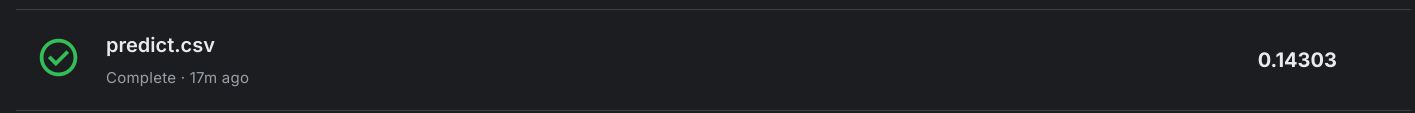

In [70]:
metrics.r2_score(clf.predict(test) , submission.reset_index()["SalePrice"])

0.0814171964336704